In [2]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

df = pd.read_json("../data/benefits_transformed.json")
df = df.dropna(subset=['embeddings'])
len(df)

# load task_transformed.json
with open('../data/benefits_transformed.json') as json_file:
    data = json.load(json_file)

# save all embeddings in a 2d array
embeddings = []

for task in data:
    if task['embeddings'] is not None:
        embeddings.append(task['embeddings'])

# convert embeddings to numpy array
X = np.array(embeddings)
X.shape


#standardize X
from sklearn.preprocessing import StandardScaler
# X = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
scaler = StandardScaler()
scaler.fit(X)
standardised_X = scaler.transform(X)
print(np.std(standardised_X,axis=0))
print(np.mean(standardised_X,axis=0))


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


[1. 1. 1. ... 1. 1. 1.]
[ 1.35592812e-16 -1.34682793e-16 -3.27606794e-16 ...  2.36604907e-17
  2.05664265e-16 -6.80694117e-16]


In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


class InOutKmeans():
    def __init__(self):
        self._centroids = []
        # self._points_in_centroids = []
        self.data = []

    def predict(self, newPoint):
        if len(self._centroids) >= 2:
            
            self.data.append(newPoint)
            
            inCluster = KMeans(n_clusters=len(self._centroids),
                               random_state=0).fit_predict(self.data)
            
            
            
            outCluster = KMeans(n_clusters=len(self._centroids)+1,
                                random_state=0).fit_predict(self.data)

            inScore = silhouette_score(self.data, inCluster)

            outScore = silhouette_score(self.data, outCluster)

            if inScore < outScore:
                # new cluster
                self._centroids.append(newPoint)
                return len(self._centroids)-1

            else:

                # return point to cluster
                label = outCluster[-1]

                return label
            
        elif (len(self._centroids) == 1):
            self.data.append(newPoint)
            self._centroids.append(newPoint)
            return 1
        else:
            # assign first point to cluster
            self._centroids.append(newPoint)
            self.data.append(newPoint)
            return 0



In [39]:
model = InOutKmeans()

# model._points_in_centroids
labels = []
data_seen = []
# for idx,i in enumerate(X_pca):
#     labels.append(model.predict(i,cutoff=0.2))
#     #plot existing data
#     #plot new data

#show centroids
centroids = np.array(model._centroids)
# plt.scatter(x=centroids[:,0],y=centroids[:,1],c='black',s=200,marker='x')
print("centroids ",centroids)
for idx,i in enumerate(X_pca):
    labels.append(model.predict(i))
    #plot existing data
    data_seen.append(i)
    print(model._centroids)
    # test = np.array(data_seen)
    #plot new data
    # plt.scatter(test[:,0],test[:,1],c=labels)
    # #show centroids
    # print(len(model._centroids))
    # centroids = np.array(model._centroids)
    # plt.scatter(x=centroids[:,0],y=centroids[:,1],c='black',s=200,marker='x')
    # print("centroids ",centroids)
    # #sabe figure to folder: "testfigure"
    # plt.savefig("testbenefits/"+str(idx)+".png")
    # plt.clf()

centroids  []
[array([0.27467288, 0.12134298])]
[array([0.27467288, 0.12134298]), array([ 0.02049128, -0.02187458])]


c:\Users\potat\miniconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\potat\miniconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Number of labels is 3. Valid values are 2 to n_samples - 1 (inclusive)

C:\Users\potat\AppData\Local\Temp\ipykernel_4968\939660968.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0],X_pca[:,1],c=labels,cmap='rainbow')


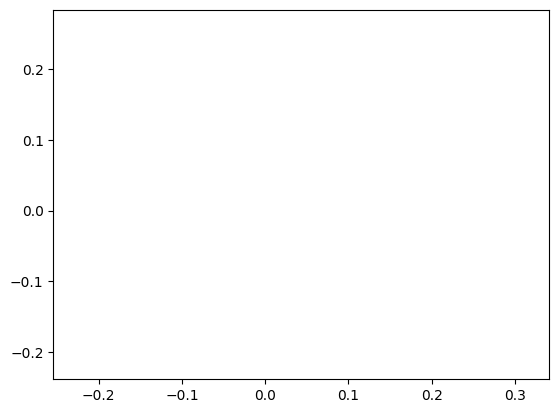

In [ ]:
#plot evolution of data
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels,cmap='rainbow')
for i in range(len(model._centroids)):
    plt.scatter(model._centroids[i][0],model._centroids[i][1],c='black',s=200,marker='x')
    